In [2]:
import pandas as pd
import numpy as np
data = pd.read_excel('rrr.xls', header=0)

In [3]:
print(data)

     y_true  Y_pred
0         1       3
1         1       1
2         1       1
3         1       3
4         1       1
..      ...     ...
133       4       4
134       4       4
135       4       4
136       4       4
137       4       4

[138 rows x 2 columns]


In [4]:
y_true = data.y_true
y_true

0      1
1      1
2      1
3      1
4      1
      ..
133    4
134    4
135    4
136    4
137    4
Name: y_true, Length: 138, dtype: int64

In [5]:
Y_pred = data.Y_pred
Y_pred

0      3
1      1
2      1
3      3
4      1
      ..
133    4
134    4
135    4
136    4
137    4
Name: Y_pred, Length: 138, dtype: int64

In [6]:
from sklearn.metrics import classification_report      #分类报告
print('测试集分类报告：\n',classification_report(y_true = y_true,y_pred = Y_pred,digits=4))

测试集分类报告：
               precision    recall  f1-score   support

           1     1.0000    0.8000    0.8889        25
           2     0.8718    0.9189    0.8947        37
           3     0.8269    0.8431    0.8350        51
           4     0.8519    0.9200    0.8846        25

    accuracy                         0.8696       138
   macro avg     0.8876    0.8705    0.8758       138
weighted avg     0.8748    0.8696    0.8697       138



In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
#绘制多分类混淆矩阵
#参数 y_true为测试数据集的真实标签，y_pred为网络对测试数据集的预测结果
def plot_confusion_matrix(y_true, y_pred,
                          cmap = plt.cm.Greens, save_flg = False):
#     classes = [str(i) for i in range(4)]#参数i的取值范围根据你自己数据集的划分类别来修改，我这儿为4代表数据集共有4类
    classes = [1,2,3,4]
#     labels = range(4)#数据集的标签类别，跟上面I对应
    labels = [1,2,3,4]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title, fontsize=18,fontname="Times New Roman")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    # classes表示不同类别的名称，比如这有5个类别
    classes = ['BR', 'LC', 'MC', 'TC']
    plt.xticks(tick_marks, classes, fontsize=10,fontname="Times New Roman")
    plt.yticks(tick_marks, classes, fontsize=10,fontname="Times New Roman")
    print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontname="Times New Roman")
    plt.ylabel('True label', fontsize=14,fontname="Times New Roman")
    plt.xlabel('Predicted label', fontsize=14,fontname="Times New Roman")
    plt.savefig("./confusion_matrix.png", dpi=720)
    plt.show()

Confusion matrix, without normalization


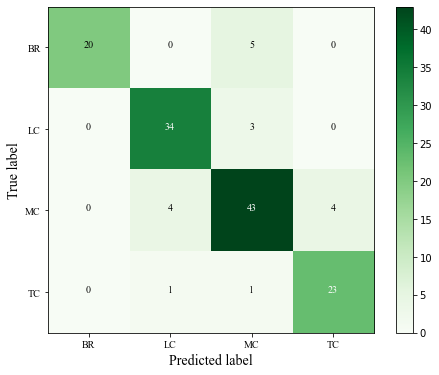

In [9]:
plot_confusion_matrix(y_true, Y_pred, save_flg = True)#调用混淆矩阵